In [1]:
import torch
from torch import tensor
import matplotlib.pyplot as plt

In [2]:
xD = tensor([[1.0], [2.0], [3.0]])
yD = tensor([[2.0], [4.0], [6.0]])

In [3]:
# Model
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1,1)
        
    def forward(self, x):
        yP = self.linear(x)
        return yP

In [4]:
model = Model()

In [5]:
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [6]:
# Training loop
epochs = 100

lossV = []

for epoch in range(epochs):
    # 1) Forward pass: Compute predicted y by passing x to the model
    yP = model(xD)

    # 2) Compute and print loss
    loss = criterion(yP, yD)
    lossV.append(loss)
    
    if(epoch % 10 == 0):
        print(f'Epoch: {epoch} | Loss: {loss.item()} ')

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch: 0 | Loss: 64.15380859375 
Epoch: 10 | Loss: 0.32575297355651855 
Epoch: 20 | Loss: 0.2649836838245392 
Epoch: 30 | Loss: 0.22926709055900574 
Epoch: 40 | Loss: 0.19836892187595367 
Epoch: 50 | Loss: 0.17163503170013428 
Epoch: 60 | Loss: 0.14850381016731262 
Epoch: 70 | Loss: 0.1284901350736618 
Epoch: 80 | Loss: 0.11117377132177353 
Epoch: 90 | Loss: 0.09619094431400299 


In [7]:
yT = model(tensor([[4.0]]))
print(yT)

tensor([[7.6660]], grad_fn=<AddmmBackward>)


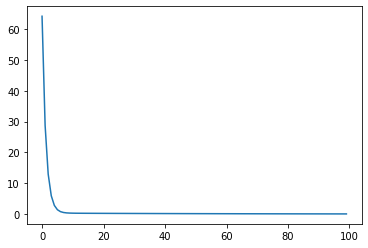

In [8]:
plt.plot(range(epochs), lossV)
plt.show()